# **Data Glacier Final Project ( Week8)**

**Specialization** : Data Science

**Project Name**: Bank Marketing (Campaign)

**Group Name** : Data Scientist Geeks

**Team member 1 Name**:
 *Refka Mejri*    |     National Engineering School of Tunis |  Tunisia

 **Team member 2 Name** 
*Tasnime Hamdeni*  |   National Engineering School of Tunis |   Tunisia

## **Import libraries**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data understanding**

In [5]:
# bank data
bank_additional_full = pd.read_csv('/content/drive/MyDrive/bank-additional/bank-additional/bank-additional-full.csv', delimiter = ';')

In [6]:
bank_additional_full 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [7]:
bank_additional_full .dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [8]:
bank_additional_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
bank_additional_full.shape

(41188, 21)

In [10]:
bank_additional_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [11]:
bank_additional_full.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [12]:
col_names = bank_additional_full.columns
print(col_names)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


# **Handling Missing Values**

In [13]:
#Missing Values
bank_additional_full.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# **Dealing with duplication**

In [14]:
data_dup = bank_additional_full[bank_additional_full.duplicated(keep="last")]
data_dup

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20072,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20531,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25183,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28476,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32505,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [15]:
data_dup.shape

(12, 21)

we have 12 rows which are duplicates. We will drop these duplicate rows as first step in our preprocessing.

In [16]:
data = bank_additional_full.drop_duplicates()
data.shape

(41176, 21)

# **Outlier Detection**

In [17]:
bank_additional_full.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [18]:
numeric_data = bank_additional_full.select_dtypes(include=np.number) 
numeric_col = numeric_data.columns 

In [19]:
numeric_col

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [20]:
bank_additional_full['age'].describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [21]:
bank_additional_full['age'].mean()

40.02406040594348

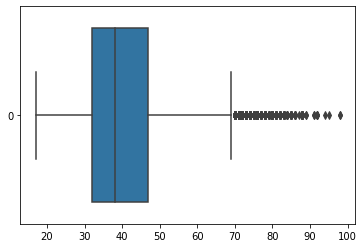

In [22]:
sns.boxplot(data = bank_additional_full.age, orient ='h')
plt.show()

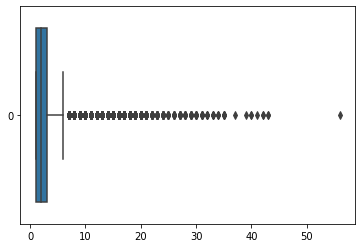

In [23]:
sns.boxplot(data = bank_additional_full.campaign, orient ='h')
plt.show()

In [24]:
my_list = ['age','campaign','y']

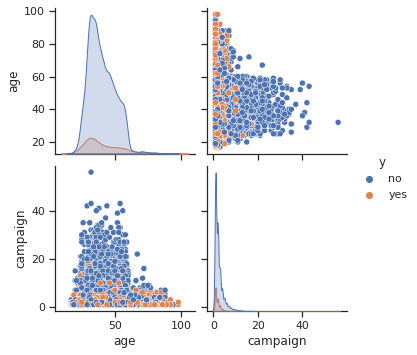

In [25]:
sns.set(style ='ticks')
sns.pairplot(data = bank_additional_full[my_list], hue = 'y')
plt.show()

In [26]:
categorical_data = bank_additional_full.select_dtypes(exclude=np.number) # we will exclude data with numeric features
categorical_col = categorical_data.columns 

In [27]:
categorical_col

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

# **Feature correlation**

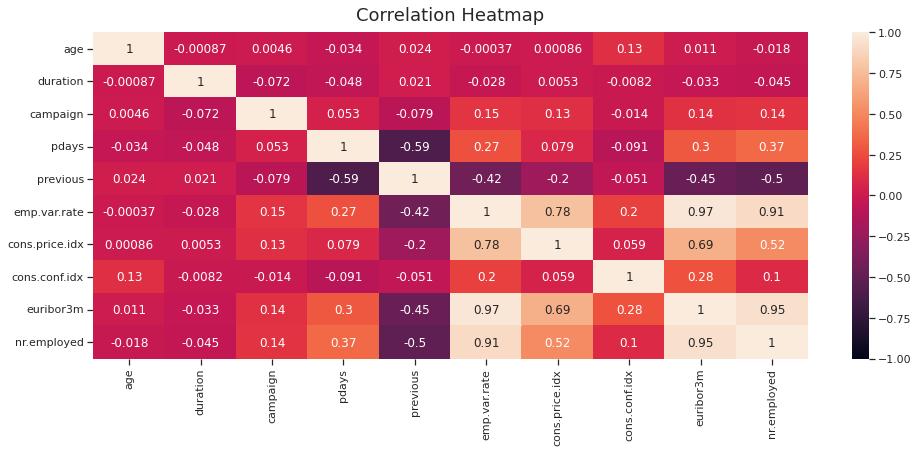

In [28]:
 #Plot features correlation
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(bank_additional_full.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

Let's verify number of observations

In [29]:
print(f"Number of clients: {bank_additional_full.shape[0]}")

Number of clients: 41188


# **Duplication Verification**

In [30]:
print(f"Number of duplicate entries: {bank_additional_full.duplicated().sum()}")


Number of duplicate entries: 12


# **Let's convert the target to a binary**

In [31]:
bank_additional_full['target'] = bank_additional_full.apply(lambda row: 1 if row["y"] == "yes" else 0, axis=1)
bank_additional_full.drop(["y"],axis=1,inplace=True)

# **Replacing the dots with underscores for better working with different variables**

In [32]:
bank_additional_full.rename(columns={"emp.var.rate":"emp_var_rate", "cons.price.idx":"cons_price_idx", "cons.conf.idx":"cons_conf_idx", "nr.employed":"nr_employed"},inplace=True)

In [33]:
bank_additional_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [34]:
numeric_data = bank_additional_full.select_dtypes(include=np.number) 
numeric_col = numeric_data.columns 

In [35]:
numeric_col

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'target'],
      dtype='object')

# **let's verify if the data is imbalenced or not**

[0] Clients not subscribedto  the term deposit: 36548
[1] Clients subscribed to the term deposit: 4640


,clients,%
0,36548,88.73
1,4640,11.27


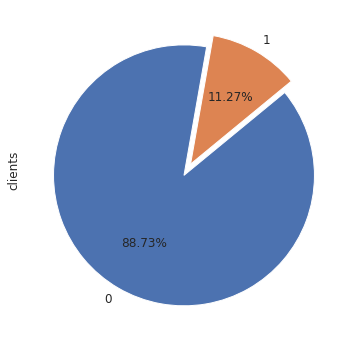

In [36]:
target_to_clients= bank_additional_full.target.value_counts().to_frame().rename(columns={"target":"clients"})
calcul_percent = (bank_additional_full.target.value_counts(normalize=True) *100).to_frame().rename(columns={"target":"%"})
bank_additional_full_balenced = pd.concat([target_to_clients,calcul_percent],axis=1).round(decimals=2)

print(f"[0] Clients not subscribedto  the term deposit: {bank_additional_full.target.value_counts()[0]}")
print(f"[1] Clients subscribed to the term deposit: {bank_additional_full.target.value_counts()[1]}")

display(bank_additional_full_balenced)
target_to_clients.plot(kind='pie', subplots=True, autopct='%1.2f%%', 
             explode= (0.05, 0.05), startangle=80, 
             legend=False, fontsize=12, figsize=(14,6));

I conclude that the dataset is imbalenced.The 0(No) classe is high than the class 1(yes)

In [37]:
numeric_col1 = numeric_col.drop(['target'])

In [38]:
numeric_col1

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed'],
      dtype='object')

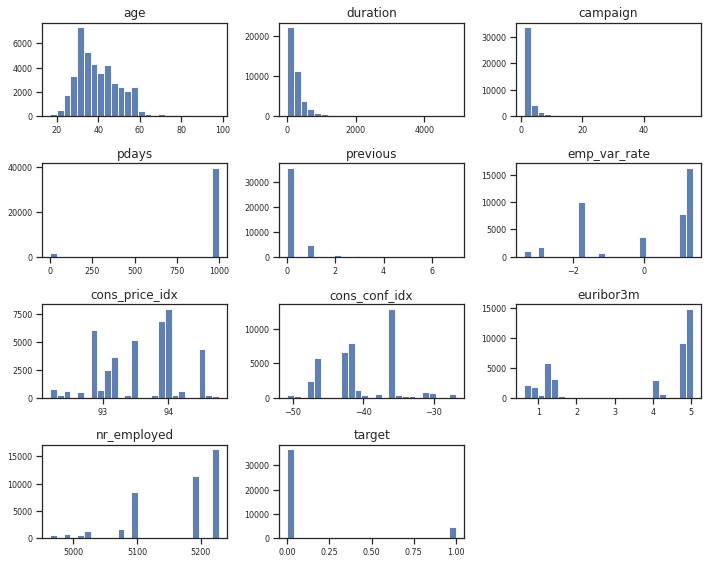

In [39]:
bank_additional_full[numeric_col].hist(figsize=(10,8), bins=25, xlabelsize=8, ylabelsize=8, alpha=0.9, grid=False)
plt.tight_layout();

# **Let's verify boxplot and distribution using graph**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


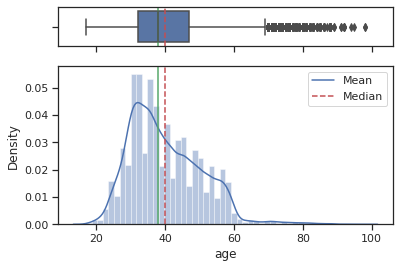

In [40]:

AGE = bank_additional_full.age
np.array(AGE).mean()
np.median(AGE)


f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 2)})
mean=np.array(AGE).mean()
median=np.median(AGE)

sns.boxplot(AGE, ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
sns.distplot(AGE, ax=ax_hist)

ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
plt.legend({'Mean':mean,'Median':median})
ax_box.set(xlabel='')

plt.show()

In [41]:
#let's calculate percentile of age variable
display(bank_additional_full.age.quantile(q=[.01, .05, .95]))

0.01    23.0
0.05    26.0
0.95    58.0
Name: age, dtype: float64

Text(0.5, 0, 'age')

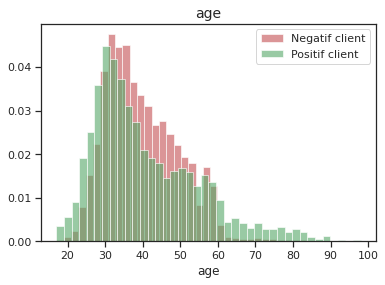

In [42]:
Unsubscribed_Age = bank_additional_full[bank_additional_full.target == 0].iloc[:,:1]
Subscribed_Age= bank_additional_full[bank_additional_full.target == 1].iloc[:,:1]
data1 = np.array(Unsubscribed_Age)
data2 = np.array(Subscribed_Age)
np.warnings.filterwarnings('ignore')
plt.hist(data1, bins=40, density=True, color="r", alpha = 0.6, label='Negatif client')
plt.hist(data2, bins=40, density=True, color="g", alpha = 0.6, label='Positif client')
plt.legend(loc='upper right')
plt.title('age', fontsize=14)
plt.xlabel('age')

In [43]:
bank_additional_full['range_age'] = pd.cut(bank_additional_full['age'], bins = [bank_additional_full['age'].min(), 30, 60, bank_additional_full['age'].max()],labels=['Young', 'Adult', 'Senior'])

In [44]:
Rang_age_target = bank_additional_full.groupby(['range_age'])['target'].mean().multiply(100)

range_age
Young     15.207373
Adult      9.430005
Senior    45.494505
Name: target, dtype: float64

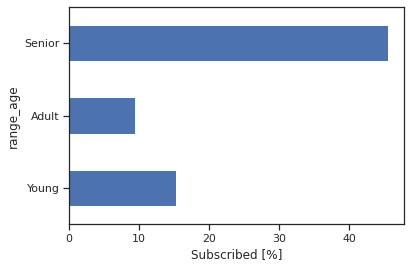

In [45]:
display(Rang_age_target)
Rang_age_target.plot.barh()

plt.xlabel('Subscribed [%]');

# **Let's check correlation of a specific numeric variable witch can have economic effect on target variable**

In [46]:
Economic_var = ["cons_price_idx", "cons_conf_idx", "euribor3m", "emp_var_rate", "target"]
bank_additional_full[Economic_var].corr()

,cons_price_idx,cons_conf_idx,euribor3m,emp_var_rate,target
cons_price_idx,1.000000,0.058986,0.688230,0.775334,-0.136211
cons_conf_idx,0.058986,1.000000,0.277686,0.196041,0.054878
euribor3m,0.688230,0.277686,1.000000,0.972245,-0.307771
emp_var_rate,0.775334,0.196041,0.972245,1.000000,-0.298334
target,-0.136211,0.054878,-0.307771,-0.298334,1.000000


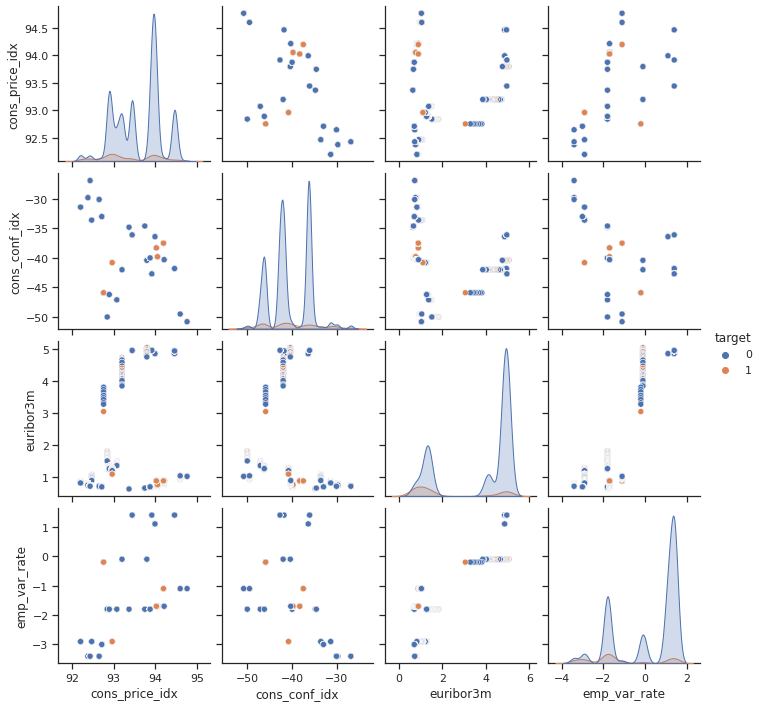

In [47]:
sns.pairplot(bank_additional_full[Economic_var], hue="target")
plt.show()

In [1]:
bank_additional_ful_drop = bank_additional_full[numeric_col].drop(["target"], axis=1).copy()

NameError: ignored